<h1> Where effective subsampling can fail

In [1]:
%matplotlib inline
from effective_quadratures.parameter import Parameter
from effective_quadratures.polynomial import Polynomial
from effective_quadratures.indexset import IndexSet
from effective_quadratures.effectivequads import EffectiveSubsampling
from effective_quadratures.utils import compute_errors, evalfunction, column
import matplotlib.pyplot as plt
import numpy as np

In this notebook, we present a simple 2D example where the effectively subsampled quadrature technique may fail. Consider the following 2D function

In [2]:
def fun(x):
        return 1.0/(1 + 50*(x[0]- 0.9)**2 + 50*(x[1] + 0.9)**2 )


We may approximate it with a 2D tensor grid with 10 points in each direction:

In [3]:
###############################################################################################
# Tensor grid 
################################################################################################
value_large = 10
x1 = Parameter(param_type="Uniform", lower=-1, upper=1, points=value_large)
x2 = Parameter(param_type="Uniform", lower=-1, upper=1, points=value_large)
uq = Polynomial([x1,x2])
p, w = uq.getPointsAndWeights()

Or we may use the effective subsampling technique with a hyperbolic basis with a q parameter of 0.3:

In [4]:
################################################################################
# Using effective quadratures
################################################################################
no_of_subsamples = 10
x1 = Parameter(param_type="Uniform", lower=-1, upper=1, points=no_of_subsamples)
x2 = Parameter(param_type="Uniform", lower=-1, upper=1, points=no_of_subsamples)
parameters = [x1, x2]
Hyperbolic = IndexSet("Hyperbolic basis", orders=[no_of_subsamples-1,no_of_subsamples-1], q=0.3)
esq = EffectiveSubsampling(parameters, Hyperbolic)
minimum_subsamples = esq.least_no_of_subsamples_reqd() 
esq.set_no_of_evals(minimum_subsamples)

Now let's have a look at where exactly these subsamples lie

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


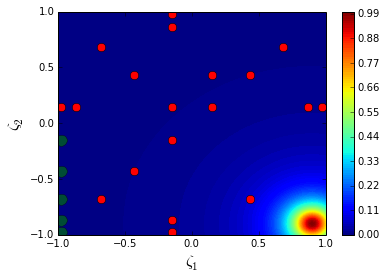

In [5]:
################################################################################
# Plots of sample locations
################################################################################
xvec = np.linspace(-1.,1.,100)                               
x,y = np.meshgrid(xvec, xvec)
z =  1.0/(1 + 50*(x - 0.9)**2 + 50*(y + 0.9)**2 )                     
plt.contourf(x, y, z, 100, rasterized=False)      
plt.plot(p[0:5,0], p[0:5,1], 'go',  markersize=11, alpha=0.6)  
plt.plot(esq.subsampled_quadrature_points[:,0], esq.subsampled_quadrature_points[:,1], 'ro',  markersize=8)                       
plt.colorbar()
plt.xlabel(r'$\zeta_1$', fontsize=16)
plt.ylabel(r'$\zeta_2$', fontsize=16)
plt.show()

In the figure above, the green points are from the tensor grid, while the red points are a few subsamples of that grid. It is readily apparent that the subsampled points fail to capture the jump in the function around (0.9, -0.9). The point to note here is that the subsampling procedure is invariant to the response of the function. For completeness, we include a plot of the basis terms used when determining the subsamples, below:

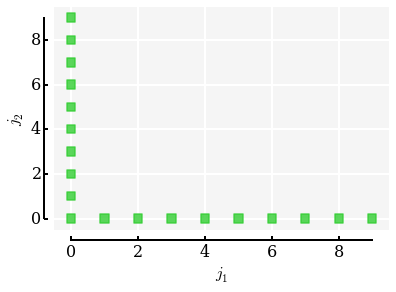

In [6]:
Hyperbolic.plot()